# 4MultiClass task-model MLP

### Import libraries
The required libraries for this notebook are pandas, sklearn, copy, numpy, pickle and matplotlib.




In [90]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from sklearn import metrics

### Load the data
We are going to use the Brain Tumors dataset 

In [2]:
data=pd.read_csv('./dataset/label.csv')
df0=pd.DataFrame(data)

In [3]:
Data_reduced=np.load('Data_reduced.npy')

### Shuffle and split the data into training and test set

In [4]:
Values= Data_reduced.copy()

In [5]:
Target=[]
for tumor in df0.label:
    if tumor == 'no_tumor':
        Target.append(0)
    elif tumor == 'meningioma_tumor':
        Target.append(1)
    elif tumor == 'glioma_tumor':
        Target.append(2)
    elif tumor == 'pituitary_tumor':
        Target.append(3)
Target = np.array(Target)
print(Target)
#pd.DataFrame(Target).to_csv('Target.csv')

[1 0 1 ... 2 2 3]


0 represents no tumor   

1 represents meningioma_tumor

2 represents glioma_tumor

3 represents pituitary_tumor

In [6]:
Values, Target = shuffle(Values,Target)
x_Train, x_Test, y_Train, y_Test = train_test_split(Values, Target, train_size=0.8, random_state=0)

In [7]:
print(x_Train.shape, x_Test.shape, len(y_Train), len(y_Test))

print('Train set: {}  | Test set: {}'.format(round(((len(y_Train)*1.0)/len(Values)),3),
                                                       round((len(y_Test)*1.0)/len(Values),3)))

(2400, 839) (600, 839) 2400 600
Train set: 0.8  | Test set: 0.2


### Multiple Classification: Multi-layer Perceptron classifier

In [113]:
# Pre-process data
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
x_Train1 = scaler.fit_transform(x_Train)
x_Test1 = scaler.transform(x_Test)
scaler = StandardScaler()
x_Train2 = scaler.fit_transform(x_Train)
x_Test2 = scaler.transform(x_Test)

In [148]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[x_Train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax',kernel_regularizer = tf.keras.regularizers.l2(0.01))])

In [149]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              metrics=['accuracy'])


In [150]:
trainer=model.fit(x_Train2,y_Train,batch_size=256,epochs=100,validation_data=(x_Test2,y_Test))

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 0s 143us/sample - loss: 2.2600 - accuracy: 0.2862 - val_loss: 1.3957 - val_accuracy: 0.4100
Epoch 2/100
2400/2400 [==============================] - 0s 18us/sample - loss: 1.3614 - accuracy: 0.3950 - val_loss: 1.3255 - val_accuracy: 0.4417
Epoch 3/100
2400/2400 [==============================] - 0s 18us/sample - loss: 1.2454 - accuracy: 0.4975 - val_loss: 1.1904 - val_accuracy: 0.5533
Epoch 4/100
2400/2400 [==============================] - 0s 17us/sample - loss: 1.0871 - accuracy: 0.5896 - val_loss: 1.0328 - val_accuracy: 0.6250
Epoch 5/100
2400/2400 [==============================] - 0s 18us/sample - loss: 0.9014 - accuracy: 0.6708 - val_loss: 0.8750 - val_accuracy: 0.6933
Epoch 6/100
2400/2400 [==============================] - 0s 19us/sample - loss: 0.6612 - accuracy: 0.7783 - val_loss: 0.7398 - val_accuracy: 0.7450
Epoch 7/100
2400/2400 [==============================] - 0s 18us

Epoch 56/100
2400/2400 [==============================] - 0s 17us/sample - loss: 0.0443 - accuracy: 0.9942 - val_loss: 0.5219 - val_accuracy: 0.8633
Epoch 57/100
2400/2400 [==============================] - 0s 17us/sample - loss: 0.0462 - accuracy: 0.9921 - val_loss: 0.5242 - val_accuracy: 0.8633
Epoch 58/100
2400/2400 [==============================] - 0s 18us/sample - loss: 0.0443 - accuracy: 0.9912 - val_loss: 0.5165 - val_accuracy: 0.8517
Epoch 59/100
2400/2400 [==============================] - 0s 17us/sample - loss: 0.0439 - accuracy: 0.9937 - val_loss: 0.5093 - val_accuracy: 0.8517
Epoch 60/100
2400/2400 [==============================] - 0s 18us/sample - loss: 0.0459 - accuracy: 0.9908 - val_loss: 0.5476 - val_accuracy: 0.8483
Epoch 61/100
2400/2400 [==============================] - 0s 17us/sample - loss: 0.0480 - accuracy: 0.9908 - val_loss: 0.5067 - val_accuracy: 0.8617
Epoch 62/100
2400/2400 [==============================] - 0s 17us/sample - loss: 0.0429 - accuracy: 0.9925

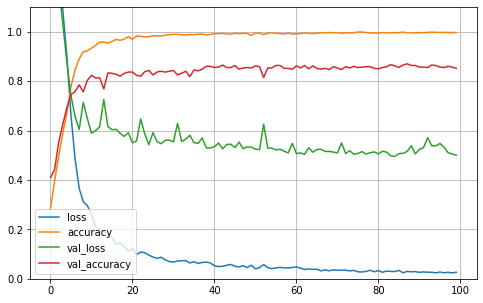

In [155]:
pd.DataFrame(trainer.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.savefig('./Diagram/MLP.png')
plt.show()

In [152]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 839)               0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 839)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               215040    
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 4)               

In [156]:
model.save('./model/MLP.h5')
model =tf.keras.models.load_model('./model/MLP.h5')

In [157]:
y_pred_MLP =model.predict_classes(x_Test2)
score_MLP=metrics.accuracy_score(y_Test,y_pred_MLP )
print('Multi-layer Perceptron classifier Accuracy on test set:',score_MLP)

Multi-layer Perceptron classifier Accuracy on test set: 0.8516666666666667
